In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
# load dataset
data = pd.read_csv('Q1.csv')
data.head()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape
data_train,data_test = train_test_split(
    data,
    #data.drop(labels=['Y'], axis=1),
    #data['Y'],
    train_size=500,
    shuffle=False)

x_train = data_train.drop(labels=['Y'], axis=1)
y_train = data_train['Y']
x_test = data_test.drop(labels=['Y'], axis=1)
y_test = data_test['Y']

In [2]:
from sklearn.linear_model import LogisticRegression

coefs = []
for i in range(45):
    coefs.append([])

B = 10000
np.random.seed(12)
for l in range(10000):
    data_boot = data_train.iloc[np.random.randint(0,500,500),]
    #print(data_boot)
    #data_boot = data_train.iloc[boot,]
    x_boot = data_boot.drop(labels=['Y'], axis=1)
    y_boot = data_boot['Y']
    classifier = LogisticRegression(solver='liblinear', C=1, penalty='l1')
    classifier.fit(x_boot, y_boot)
    for i in range(len(classifier.coef_[0])):
        coefs[i].append(classifier.coef_[0][i])
#print(coefs[0])

In [3]:
coef_mean = []
coef_std = []
for i in range(45):
    coef_mean.append(np.mean(coefs[i]))
    coef_std.append(np.std(coefs[i],ddof=1))

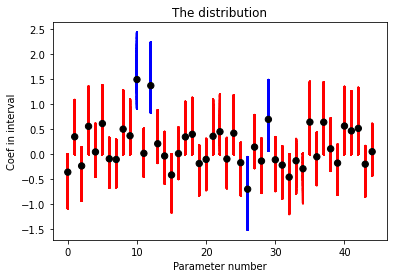

In [10]:
import matplotlib.pyplot as plt
from scipy import stats

alpha = 0.95
B = 10000
#print(coefs[i])
dots_y = []
dots_x = []
red_cols = []
mean_cols = []
for i in range(45):
    #conf_intveral = stats.norm.interval(0.95, loc = coef_mean[i], scale=coef_std[i])
    some_coef = coefs[i]
    some_coef = np.sort(coefs[i])
    lower = some_coef[int(B * 0.05) - 1]
    higher = some_coef[int(B * 0.95) - 1]
    #print(lower, higher)
    #lower = max(0,np.percentile(coefs[i], 10))
    if (lower <= 0 and higher >= 0):
        red_cols.append(i)
    mean = 0
    for l in range(len(some_coef)):
        if (some_coef[l] >= lower and some_coef[l] <= higher):
            mean += some_coef[l]
            dots_x.append(i)
            dots_y.append(some_coef[l])
    mean = mean / len(some_coef)
    #print(mean)
    dots_x.append(i)
    dots_y.append(mean)
    mean_cols.append(len(dots_x))
    #lower = max(0,np.percentile(coefs[i], 10))
    #upper = min(np.percentile(coefs[i], 90), 1)
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
    #stats.append(abs(lower))
#plt.bar(range(45), stats)
#plt.show()
colors = []
def getColor():
    for i in range(len(dots_x)):
        if (i + 1) in mean_cols:
            colors.append("k")
        elif dots_x[i] in red_cols :
            colors.append("r")
        else: 
            colors.append("b") 
getColor()
plt.title("The distribution")
plt.xlabel("Parameter number")
plt.ylabel("Coef in interval")

plt.scatter(dots_x, dots_y,s=[40 if (i + 1) in mean_cols else 1 for i in range(len(dots_x))] , 
            c=colors)
plt.show()
